# BERGUIGA Oussama - Master Big Data Dauphine - Projet Machine Learning

##### Ce projet consiste à utiliser des méthodes d'apprentissage statistique pour des prédictions de type regression et classification, sur un jeu de données comportant des variables de types mixtes et des données manquantes 

## Importation des packages et des données

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="ticks", color_codes=True)
import missingno as msno
#import fancyimpute
from fancyimpute import MICE 

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist



from sklearn import metrics
from sklearn import cluster, datasets, mixture
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import plotly.plotly as py
import plotly.graph_objs as go



from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.feature_selection import SelectFromModel


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegressionCV

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


py.plotly.tools.set_credentials_file(username='popo95', api_key='UV0tMEa0DGHmbljqHBZz')


import itertools

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

%matplotlib inline

In [272]:
data_train=pd.read_csv('learn.csv')
data_train['Z']=0



mask_0=data_train.Y<0
mask_1=(data_train.Y>=0) & (data_train.Y<=2) 
mask_2=data_train.Y>2


data_train.loc[mask_0,'Z']=0
data_train.loc[mask_1,'Z']=1
data_train.loc[mask_2,'Z']=2



data_train['X3']=data_train['X3'].astype('object')
data_train['X5']=data_train['X5'].astype('object')
data_train['X14']=data_train['X14'].astype('object')
data_train['X16']=data_train['X16'].astype('object')
data_train['X18']=data_train['X18'].astype('object')

## Analyse Exploratoire

In [273]:
data_train.round(4).head(10)
#remarque sur la normalisation : pas necessaire ici les donnees sont du meme ordre de grandeur

X1      X2 X3      X4 X5  X6      X7      X8      X9     X10 ...  \
0  0.5123  0.0545  c -0.2636  G   1  0.3243 -0.3732  1.4206 -0.9820 ...   
1 -0.5128  0.1263  f -0.6667  G   1  0.7185  0.0700  1.3789 -0.4919 ...   
2  0.9339  0.3176  f  0.8899  F   1 -0.2725  0.0084  1.0646 -0.2266 ...   
3  0.6801 -0.0403  c  0.1202  G  -1  0.9550  0.0443  1.7591 -0.3129 ...   
4 -0.8177  0.6459  c -0.1688  G   1 -0.2776 -0.0556  1.1841 -0.5939 ...   
5  0.8414 -0.0416  f -0.8013  F   1  0.7608 -0.4999  1.2513 -0.8648 ...   
6  0.6380  0.4956  c -0.3542  F  -1 -0.2947 -0.0734  1.5883  0.1655 ...   
7  0.8281  0.9142  f  0.5538  F  -1  0.1838  0.1305  1.1983  0.1947 ...   
8  0.7006  0.3452  c -0.8119  G  -1 -1.1428  0.0017  1.3568 -0.2531 ...   
9  0.1624 -0.0386  c -0.6472  F   1  0.8633 -0.4809  0.9459 -0.2692 ...   

      X15  X16     X17 X18     X19     X20     X21     X22       Y  Z  
0  0.3258    g  0.7993   D -0.0507 -0.6616  0.1387 -0.2114  2.3761  2  
1  0.2898    d  0.6266   C -0.4916 -0.3453  0.0011  0.4463  0.9044  1  
2  1.0855    c  0.8007   D -0.4951 -0.1661  1.5596 -0.3882  2.1327  2  
3  1.3056    d -0.0520   D  0.1707  0.4579  1.0805 -0.9820  1.1945  1  
4  0.1478    d  0.5191   D -0.4564 -0.1084  0.1938 -0.2471  0.7311  1  
5  0.4076    c  0.8808   C  0.1326  0.4446  1.2135  0.7167  1.2338  1  
6  1.6964    d -0.4961   C  0.6374 -0.3702  0.0034     NaN  0.8056  1  
7  1.8914    c  0.5388   D -0.9631  0.3911  0.7553 -0.3616  0.2713  1  
8  1.4860    d -0.5164   D -0.5501  0.8157  0.1213 -0.9910  0.8832  1  
9  1.1440    d -0.4698   D -0.3285 -0.7386  0.0154 -0.9749  0.6715  1  

[10 rows x 24 columns]

In [274]:
data_train.dtypes #un majorité de variables quantitatives et quelques variables categorielles

X1     float64
X2     float64
X3      object
X4     float64
X5      object
X6       int64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14     object
X15    float64
X16     object
X17    float64
X18     object
X19    float64
X20    float64
X21    float64
X22    float64
Y      float64
Z        int64
dtype: object

In [275]:
print(data_train.shape)

(4991, 24)


In [276]:
data_train.describe()

X1           X2           X4           X6           X7  \
count  4947.000000  4937.000000  4950.000000  4991.000000  4991.000000   
mean     -0.012431     0.258807    -0.009045     0.012623    -0.002359   
std       0.529469     0.343854     0.576313     1.000021     0.638206   
min      -0.999990    -0.185349    -0.999565    -1.000000    -2.251772   
25%      -0.498999    -0.000313    -0.507056    -1.000000    -0.519370   
50%      -0.023237     0.082541    -0.017918     1.000000    -0.013399   
75%       0.468252     0.503559     0.495626     1.000000     0.524230   
max       0.999887     1.831407     0.999561     1.000000     2.795579   

                X8           X9          X10          X11          X12  \
count  4942.000000  4937.000000  4949.000000  4961.000000  4937.000000   
mean     -0.265749     1.443633     0.001814    -1.982965     0.008750   
std       0.355178     0.261929     0.604246     0.396239     0.636321   
min      -2.333275     0.848051    -1.794967    -3.286746    -2.202988   
25%      -0.522877     1.281559    -0.504726    -2.236456    -0.517873   
50%      -0.089943     1.527788     0.009843    -2.138970     0.018840   
75%       0.000018     1.592667     0.519232    -1.676327     0.536115   
max       0.207613     2.978322     2.005761    -1.121986     2.423602   

               X13          X15          X17          X19          X20  \
count  4944.000000  4948.000000  4955.000000  4952.000000  4953.000000   
mean      0.012135     0.967509     0.007704     0.007155    -0.002746   
std       0.621483     0.701008     0.579154     0.575807     0.610201   
min      -2.020692     0.000164    -0.999151    -0.999573    -2.283870   
25%      -0.490789     0.399658    -0.496091    -0.478357    -0.497696   
50%       0.026094     0.839414     0.005675     0.007929    -0.005994   
75%       0.524273     1.403751     0.515078     0.502418     0.489464   
max       2.311045     3.572332     0.998644     0.999980     2.203168   

                X21          X22            Y            Z  
count  4.951000e+03  4950.000000  4991.000000  4991.000000  
mean   6.790953e-01    -0.531228     1.194394     1.092767  
std    8.086297e-01     0.442521     1.043998     0.551923  
min    3.130973e-10    -1.000000    -1.952944     0.000000  
25%    7.270632e-02    -0.916165     0.514739     1.000000  
50%    3.628172e-01    -0.665290     1.129763     1.000000  
75%    1.006306e+00    -0.241173     1.794277     1.000000  
max    6.404155e+00     0.949887     5.896336     2.000000

In [277]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 24 columns):
X1     4947 non-null float64
X2     4937 non-null float64
X3     4946 non-null object
X4     4950 non-null float64
X5     4934 non-null object
X6     4991 non-null int64
X7     4991 non-null float64
X8     4942 non-null float64
X9     4937 non-null float64
X10    4949 non-null float64
X11    4961 non-null float64
X12    4937 non-null float64
X13    4944 non-null float64
X14    4955 non-null object
X15    4948 non-null float64
X16    4991 non-null object
X17    4955 non-null float64
X18    4943 non-null object
X19    4952 non-null float64
X20    4953 non-null float64
X21    4951 non-null float64
X22    4950 non-null float64
Y      4991 non-null float64
Z      4991 non-null int64
dtypes: float64(17), int64(2), object(5)
memory usage: 935.9+ KB


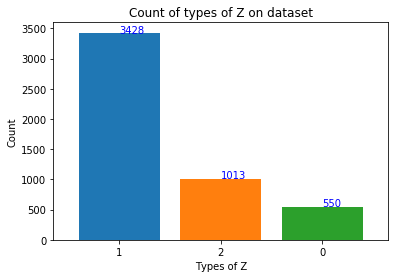

In [278]:
#Let's see how many examples we have of each target variable 
data_train['Z'].value_counts().plot(kind='bar')

#Add count over the bar
ax=data_train['Z'].value_counts().plot.bar(width=.8)
for i, v in data_train['Z'].value_counts().reset_index().iterrows():
    ax.text(i, v.Z + 0.3, v.Z, color='blue')
    
plt.xticks(rotation='horizontal') #Rotate xticks
plt.xlabel('Types of Z')
plt.ylabel('Count')
plt.title('Count of types of Z on dataset')
plt.show()

#Remarque : classes tres desequilibrees attention lors de la validation croisee!

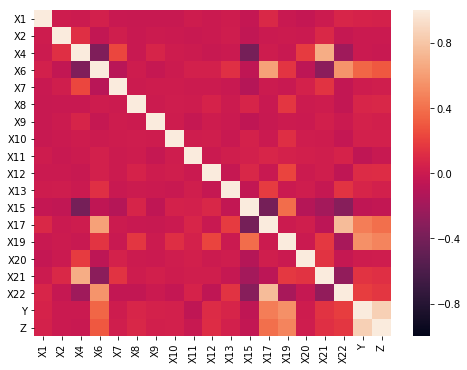

In [279]:
#Pairwise correlation between attributes
plt.rcParams['figure.figsize'] = [8, 6]
sns.heatmap(data_train.corr(), vmin = -1, vmax=1, annot=False)
plt.show()

#eventuellement une certaine correlation entre (X4,X21) (X4,X6) (X15,X17) (X15,X4) et (X17,X22) pour les variables quantitatives

In [280]:
data_train.drop(["X3","X5","X6","X14","X16","X18"],axis=1).head()#variables quantitatives uniquement

X1        X2        X4        X7        X8        X9       X10  \
0  0.512315  0.054454 -0.263647  0.324345 -0.373186  1.420635 -0.982031   
1 -0.512848  0.126323 -0.666721  0.718484  0.069966  1.378922 -0.491874   
2  0.933939  0.317565  0.889852 -0.272510  0.008428  1.064600 -0.226573   
3  0.680126 -0.040275  0.120242  0.954966  0.044339  1.759130 -0.312935   
4 -0.817749  0.645936 -0.168845 -0.277622 -0.055569  1.184052 -0.593855   

        X11       X12       X13       X15       X17       X19       X20  \
0 -1.942119  0.081959 -0.309520  0.325816  0.799284 -0.050690 -0.661569   
1 -2.129085 -0.431663 -0.657699  0.289794  0.626554 -0.491610 -0.345266   
2 -1.914737 -0.307580  0.769571  1.085498  0.800721 -0.495149 -0.166100   
3 -1.659626  0.668567  0.598898  1.305558 -0.051988  0.170716  0.457877   
4 -1.855813 -0.829380 -0.321190  0.147757  0.519146 -0.456433 -0.108406   

        X21       X22         Y  Z  
0  0.138681 -0.211358  2.376070  2  
1  0.001076  0.446333  0.904434  1  
2  1.559574 -0.388244  2.132658  2  
3  1.080453 -0.981970  1.194541  1  
4  0.193790 -0.247055  0.731069  1

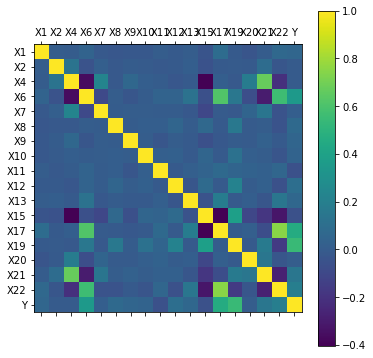

In [281]:
df=data_train.drop(columns = ['X3','X5','X14','X16','X18','Z'],axis=1)

plt.matshow(df.corr())

plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

#correlation entre Y (et donc Z par transitivite) et X19 puis dans une moindre mesure X17

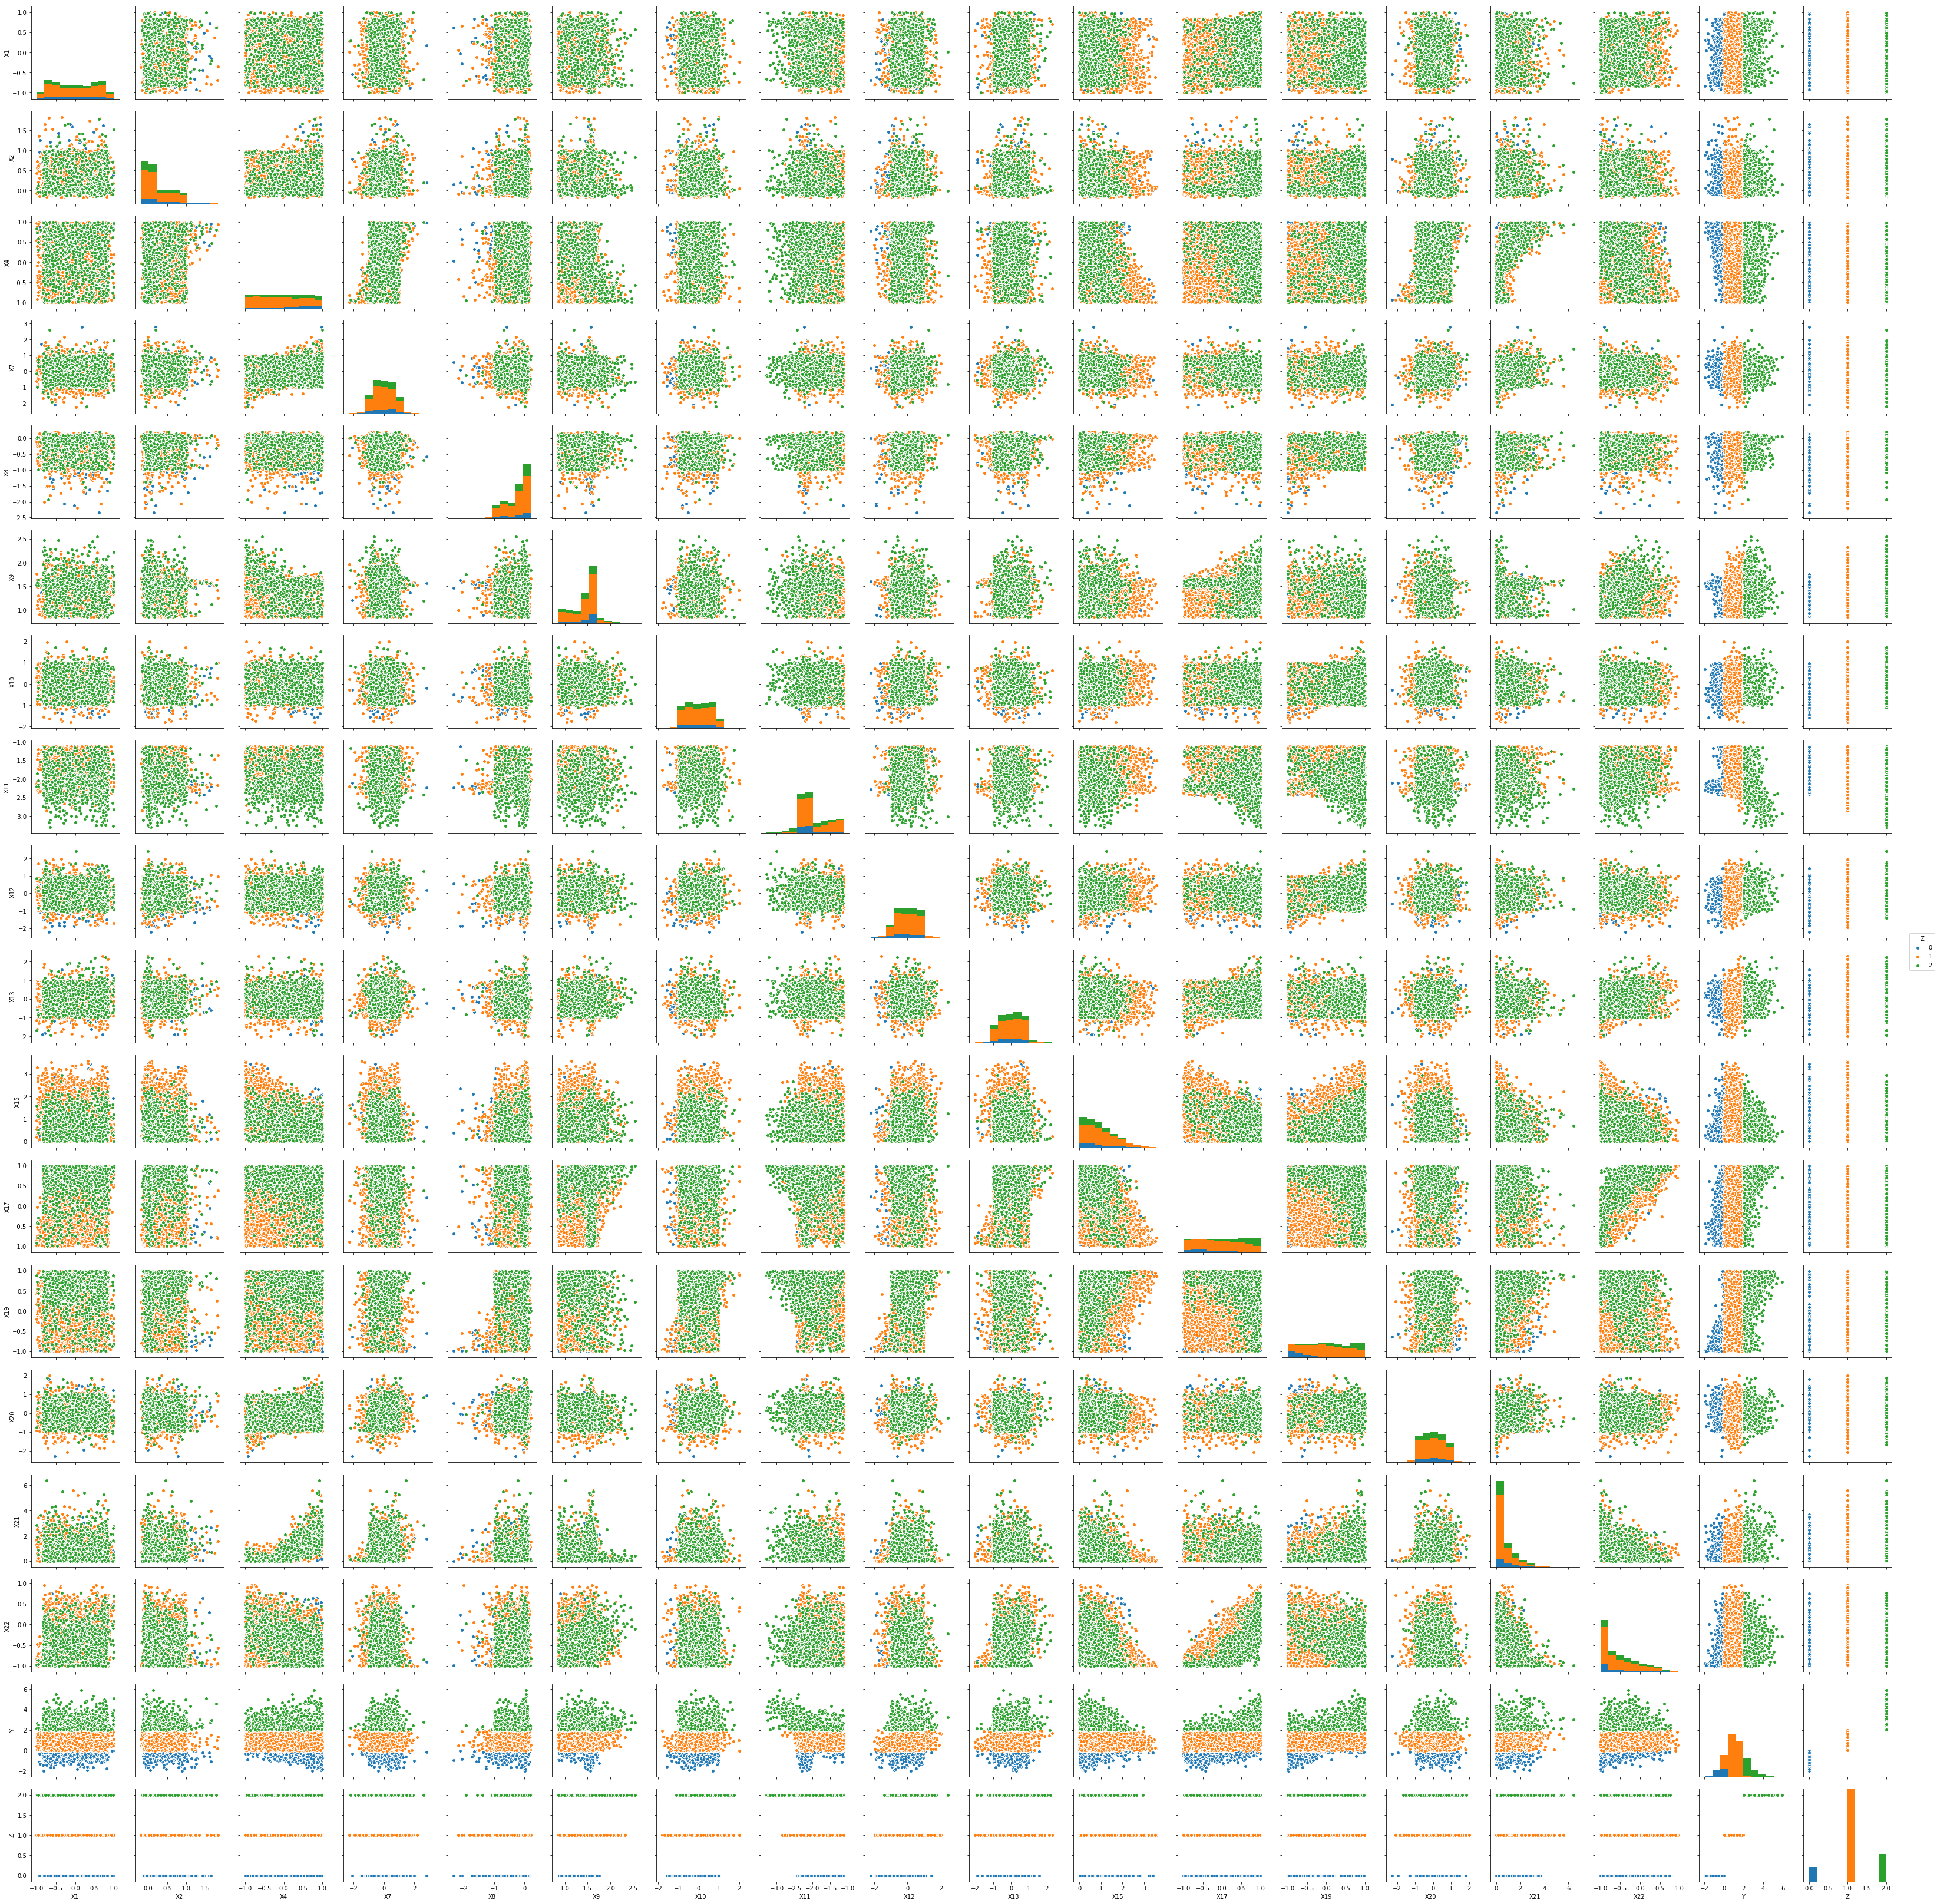

In [282]:
#Plot relationship between pairwise
sns.pairplot(data_train.drop(["X3","X5","X6","X14","X16","X18"],axis=1).dropna(), hue="Z")
plt.show()##TODO comment plots
# la loi de Y ressemble a une gaussienne, et les classes Z=0 et Z=2 correspondent aux queues de distribution

### Valeurs extrêmes

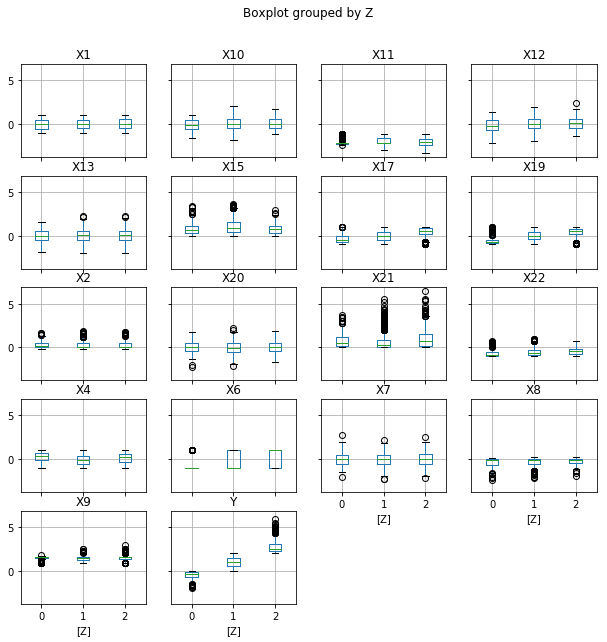

In [283]:
#Boxplot of variables

data_train.boxplot(by = "Z", figsize = (10, 10))
plt.show()#les variables a faible variance auront peu d'impact sur la prediction 

### Données manquantes

In [284]:
missing_data_train=data_train.isnull().sum()
print(missing_data_train)

X1     44
X2     54
X3     45
X4     41
X5     57
X6      0
X7      0
X8     49
X9     54
X10    42
X11    30
X12    54
X13    47
X14    36
X15    43
X16     0
X17    36
X18    48
X19    39
X20    38
X21    40
X22    41
Y       0
Z       0
dtype: int64


In [285]:
percentage_missing_data_train_in_columns=data_train.isnull().sum()/len(data_train)
print(str(round(percentage_missing_data_train_in_columns*100,2)),'en %')# dans chaque colonne environ moins de 1.5% de valeur manquante 

X1     0.88
X2     1.08
X3     0.90
X4     0.82
X5     1.14
X6     0.00
X7     0.00
X8     0.98
X9     1.08
X10    0.84
X11    0.60
X12    1.08
X13    0.94
X14    0.72
X15    0.86
X16    0.00
X17    0.72
X18    0.96
X19    0.78
X20    0.76
X21    0.80
X22    0.82
Y      0.00
Z      0.00
dtype: float64 en %


In [286]:
percentage_missing_data_train=data_train.isnull().sum().sum()/(data_train.shape[0]*data_train.shape[1])
print(round(percentage_missing_data_train*100,2),'%')#les valeurs manquantes sont très minoritaires dans le jeu de données

0.7 %


['X1', 'X2', 'X3', 'X4', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22']


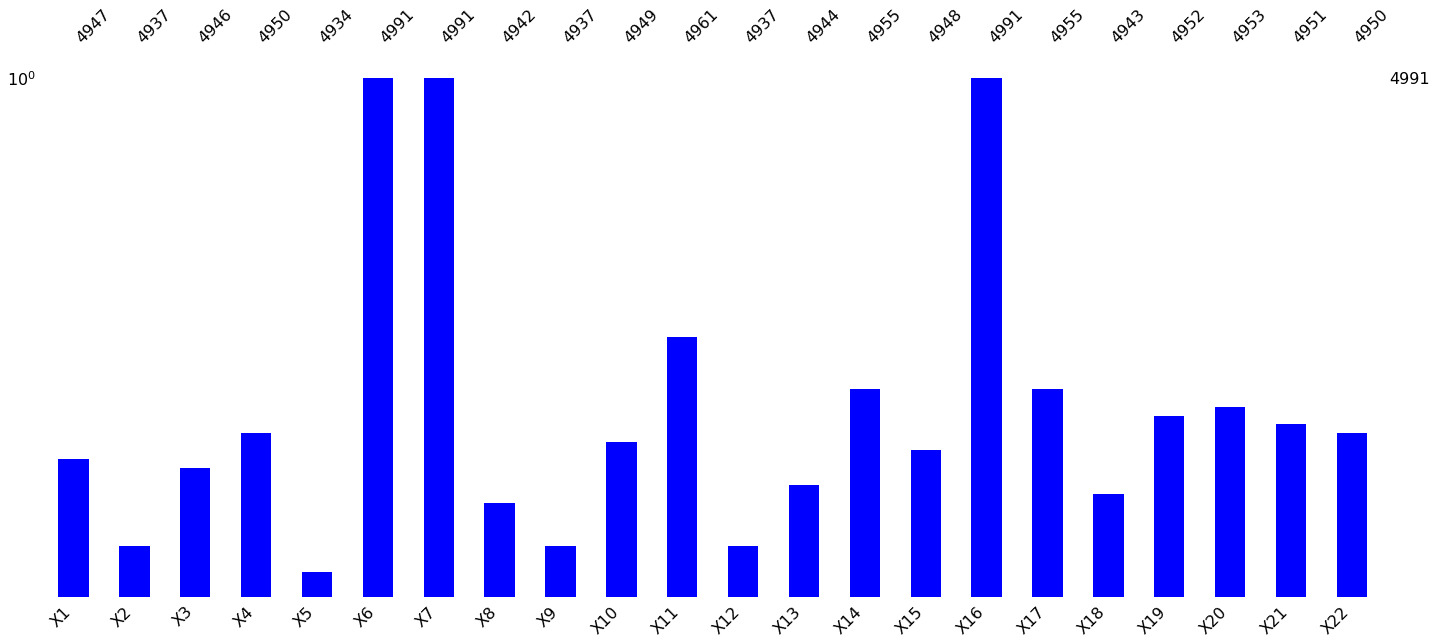

In [287]:
missingdata_df = data_train.columns[data_train.isnull().any()].tolist()
print(missingdata_df)
# la variable X11 est celle qui comporte le plus de valeurs manquantes
msno.bar(data_train.drop(['Y','Z'],axis=1), color="blue", log=True)

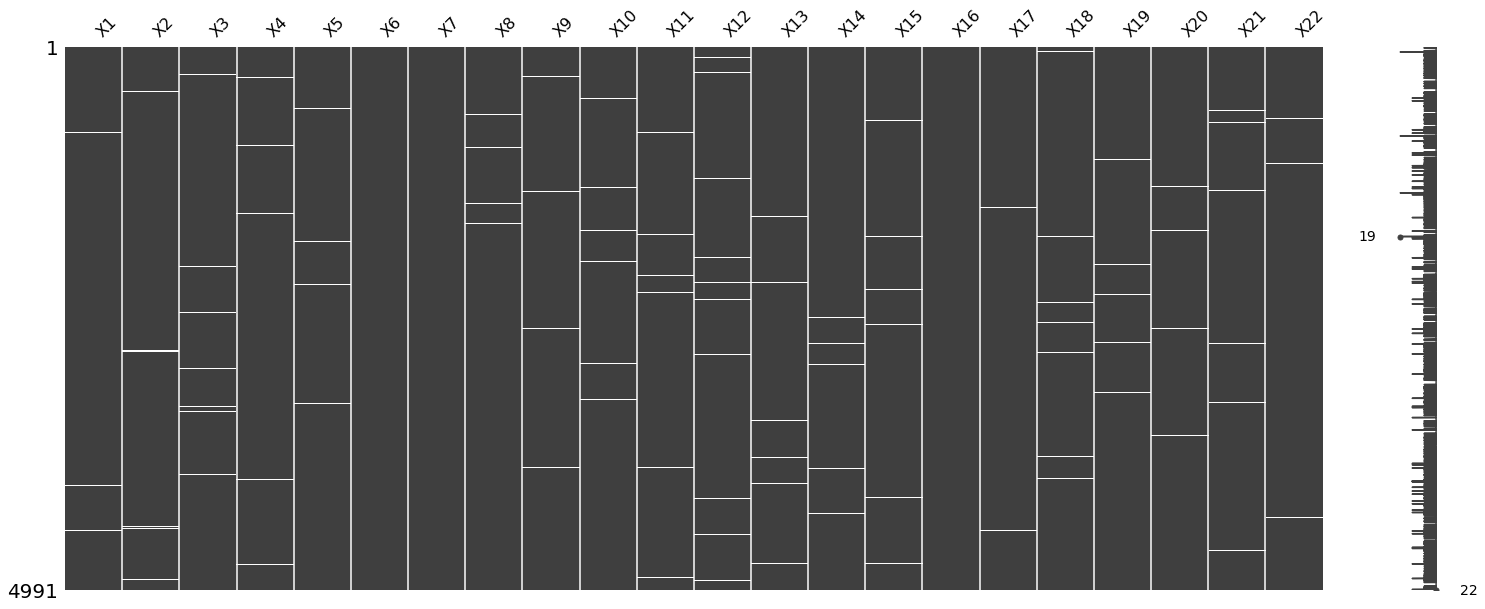

In [288]:
#apparement les variables sont de "missing completely at random"
msno.matrix(data_train.drop(['Y','Z'],axis=1))

#dans chaque ligne entre 19 et 22 variables renseignées

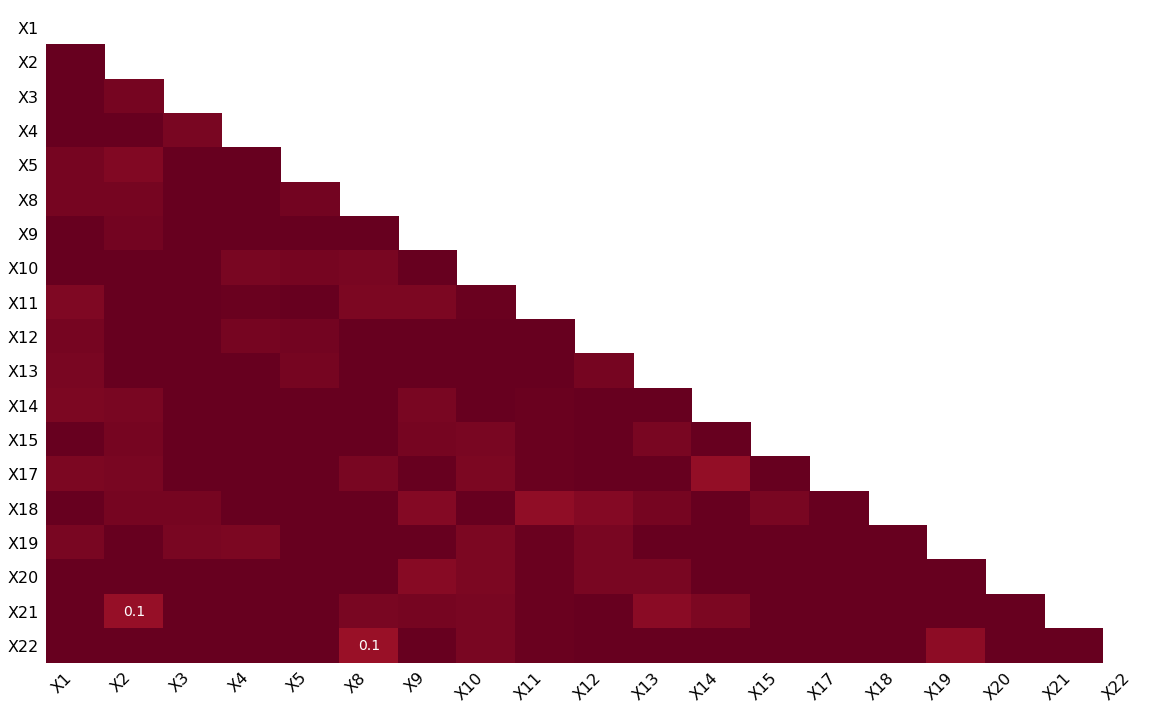

In [289]:
msno.heatmap(data_train)
#A value of -1 means that in all cases, when the first column is missing then the second column is not missing. 
#A value of 1 means that in all cases, when the first column is missing the second column is missing also. 
#A value of 0 represents no correlation at all.
#here most values are 0 : no correlation in missing values -> Missing Completely At Random
#data seems to be Missing Completely at Random

In [290]:
data_train = pd.get_dummies(data_train, columns = ['X3','X5','X14','X16','X18'],dummy_na=True,drop_first=True )
#data seems to be Missing Completely at Random

In [291]:
#imputation
data_train.head()
X_train=MICE().complete(data_train.drop(["Y","Z"],axis=1).values)


[MICE] Completing matrix with shape (4991, 31)
[MICE] Starting imputation round 1/110, elapsed time 0.007
[MICE] Starting imputation round 2/110, elapsed time 0.189
[MICE] Starting imputation round 3/110, elapsed time 0.386
[MICE] Starting imputation round 4/110, elapsed time 0.574
[MICE] Starting imputation round 5/110, elapsed time 0.765
[MICE] Starting imputation round 6/110, elapsed time 0.952
[MICE] Starting imputation round 7/110, elapsed time 1.150
[MICE] Starting imputation round 8/110, elapsed time 1.349
[MICE] Starting imputation round 9/110, elapsed time 1.546
[MICE] Starting imputation round 10/110, elapsed time 1.732
[MICE] Starting imputation round 11/110, elapsed time 1.923
[MICE] Starting imputation round 12/110, elapsed time 2.114
[MICE] Starting imputation round 13/110, elapsed time 2.325
[MICE] Starting imputation round 14/110, elapsed time 2.510
[MICE] Starting imputation round 15/110, elapsed time 2.700
[MICE] Starting imputation round 16/110, elapsed time 2.886
[M

In [292]:
data_train_imputed=pd.DataFrame(X_train)

In [293]:
data_train_imputed.columns=list(data_train.drop(["Y","Z"],axis=1))

In [294]:
data_train_imputed=pd.concat([data_train_imputed,data_train[['Y','Z']]],axis=1)
data_train_imputed.head()


X1        X2        X4   X6        X7        X8        X9       X10  \
0  0.512315  0.054454 -0.263647  1.0  0.324345 -0.373186  1.420635 -0.982031   
1 -0.512848  0.126323 -0.666721  1.0  0.718484  0.069966  1.378922 -0.491874   
2  0.933939  0.317565  0.889852  1.0 -0.272510  0.008428  1.064600 -0.226573   
3  0.680126 -0.040275  0.120242 -1.0  0.954966  0.044339  1.759130 -0.312935   
4 -0.817749  0.645936 -0.168845  1.0 -0.277622 -0.055569  1.184052 -0.593855   

        X11       X12 ...  X14_D  X14_nan  X16_d  X16_g  X16_h  X16_nan  \
0 -1.942119  0.081959 ...    0.0      0.0    0.0    1.0    0.0      0.0   
1 -2.129085 -0.431663 ...    0.0      0.0    1.0    0.0    0.0      0.0   
2 -1.914737 -0.307580 ...    1.0      0.0    0.0    0.0    0.0      0.0   
3 -1.659626  0.668567 ...    0.0      0.0    1.0    0.0    0.0      0.0   
4 -1.855813 -0.829380 ...    1.0      0.0    1.0    0.0    0.0      0.0   

   X18_D  X18_nan         Y  Z  
0    1.0      0.0  2.376070  2  
1    0.0      0.0  0.904434  1  
2    1.0      0.0  2.132658  2  
3    1.0      0.0  1.194541  1  
4    1.0      0.0  0.731069  1  

[5 rows x 33 columns]

In [295]:
missing_data_train_imputed=data_train_imputed.isnull().sum()
print(missing_data_train_imputed)

X1         0
X2         0
X4         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        0
X15        0
X17        0
X19        0
X20        0
X21        0
X22        0
X3_c       0
X3_e       0
X3_f       0
X3_nan     0
X5_G       0
X5_nan     0
X14_D      0
X14_nan    0
X16_d      0
X16_g      0
X16_h      0
X16_nan    0
X18_D      0
X18_nan    0
Y          0
Z          0
dtype: int64


### Hierarchical clustering

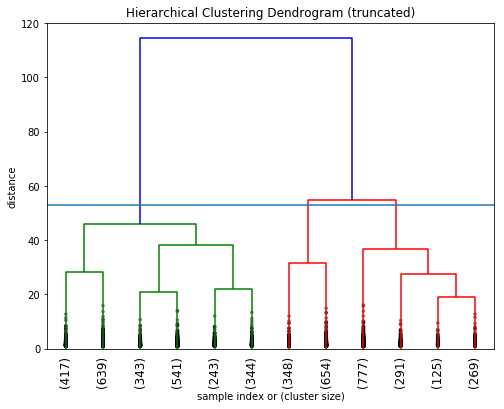

In [296]:
#X_train=data_train_imputed.drop(["Y","Z"],axis=1).values
X_train=data_train_imputed.iloc[:,0:17].values


Z=linkage(X_train,'ward')
#dendrogram(Z,truncate_mode='lastp',p=12,leaf_rotation=45.,leaf_font_size=15.,show_contracted=True)
#plt.axhline(y=55)
# calculate full dendrogram

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.axhline(y=53)
#on voit apparaitre deux clusters avec une distance entre les 2 d'environ 115

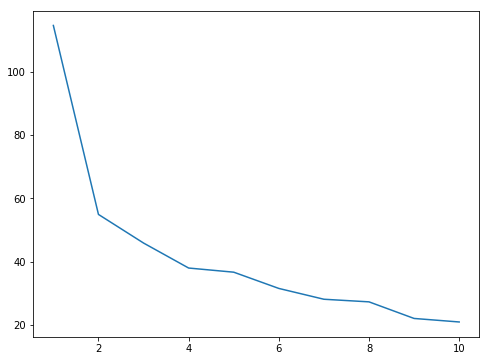

In [297]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)


#d'après la regle du coude le nombre de 2 clusters semblent un très bon choix

### ACP + KMEANS

[0.24 0.15]


([], <a list of 0 Text yticklabel objects>)

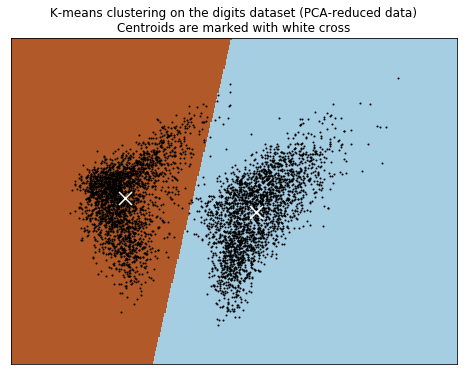

In [298]:
# Visualize the results on PCA-reduced data

k=2
pca = PCA(n_components=2, )
reduced_data = pca.fit_transform(X_train)
print(pca.explained_variance_ratio_)
kmeans = KMeans(init='k-means++', n_clusters=k, n_init=20)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [299]:
y_cluster = []

compteur = 0

 
k=2

   
algorithm = cluster.KMeans(init='k-means++', n_clusters=k, max_iter= 600, n_init = 80)

algorithm.fit(X_train)

y_pred = algorithm.predict(X_train)

y_cluster.append([])

y_cluster[compteur].extend(y_pred)


df_y_clustering = pd.DataFrame(data= np.transpose(y_cluster), columns=['nb_cluster_2'])

df_y_clustering.head()

 
data_train_imputed = data_train_imputed.merge(df_y_clustering, right_index=True, left_index=True)

data_train_imputed.head()

X1        X2        X4   X6        X7        X8        X9       X10  \
0  0.512315  0.054454 -0.263647  1.0  0.324345 -0.373186  1.420635 -0.982031   
1 -0.512848  0.126323 -0.666721  1.0  0.718484  0.069966  1.378922 -0.491874   
2  0.933939  0.317565  0.889852  1.0 -0.272510  0.008428  1.064600 -0.226573   
3  0.680126 -0.040275  0.120242 -1.0  0.954966  0.044339  1.759130 -0.312935   
4 -0.817749  0.645936 -0.168845  1.0 -0.277622 -0.055569  1.184052 -0.593855   

        X11       X12      ...       X14_nan  X16_d  X16_g  X16_h  X16_nan  \
0 -1.942119  0.081959      ...           0.0    0.0    1.0    0.0      0.0   
1 -2.129085 -0.431663      ...           0.0    1.0    0.0    0.0      0.0   
2 -1.914737 -0.307580      ...           0.0    0.0    0.0    0.0      0.0   
3 -1.659626  0.668567      ...           0.0    1.0    0.0    0.0      0.0   
4 -1.855813 -0.829380      ...           0.0    1.0    0.0    0.0      0.0   

   X18_D  X18_nan         Y  Z  nb_cluster_2  
0    1.0      0.0  2.376070  2             0  
1    0.0      0.0  0.904434  1             0  
2    1.0      0.0  2.132658  2             0  
3    1.0      0.0  1.194541  1             1  
4    1.0      0.0  0.731069  1             0  

[5 rows x 34 columns]

### ACP

In [300]:
pca = PCA(n_components=17, )

array = pca.fit_transform(X_train)

print(pca.explained_variance_ratio_)

columns = ['Component_1',

       'Component_2',

       'Component_3',

       'Component_4',

       'Component_5',

       'Component_6',

       'Component_7',

       'Component_8',

       'Component_9',

       'Component_10',

       'Component_11',

       'Component_12',

       'Component_13',

       'Component_14',

       'Component_15',

       'Component_16',

       'Component_17'
]

PCA_Graphique = pd.DataFrame(array, columns = columns)

PCA_Graphique = PCA_Graphique.merge(df_y_clustering, right_index=True, left_index=True)

#les 3 composantes principales expliquent environ 50% de la variance

[0.24 0.15 0.1  0.07 0.06 0.06 0.06 0.06 0.05 0.03 0.03 0.02 0.02 0.02
 0.02 0.01 0.01]


In [301]:


 

cluster_1 =  PCA_Graphique[PCA_Graphique.nb_cluster_2 == 0]

cluster_2 =  PCA_Graphique[PCA_Graphique.nb_cluster_2 == 1]

 

# Create a trace

trace_1 = go.Scatter3d(

    x = cluster_1['Component_1'],

    y = cluster_1['Component_2'],

    z = cluster_1['Component_3'],

    mode = 'markers'

)

trace_2 = go.Scatter3d(

    x = cluster_2['Component_1'],

    y = cluster_2['Component_2'],

    z = cluster_2['Component_3'],

    mode = 'markers'

)

 

data = [trace_1,trace_2]

 
# Plot and embed in ipython notebook!


py.iplot(data, filename='basic-scatter')

#on voit graphiquement sur une projection 3d (environ 50 % de l'inertie du nuage représentée) que l'hypothese de 2 clusters est hautement plausible

In [302]:
PCA_Graphique = PCA_Graphique.merge(data_train['Z'].to_frame(), right_index=True, left_index=True)





 

class_0 =  PCA_Graphique[PCA_Graphique.Z == 0]
class_1 =  PCA_Graphique[PCA_Graphique.Z == 1]
class_2 =  PCA_Graphique[PCA_Graphique.Z == 2]

 

# Create a trace

trace_1 = go.Scatter3d(

    x = class_0['Component_1'],

    y = class_0['Component_2'],

    z = class_0['Component_3'],

    mode = 'markers'

)

trace_2 = go.Scatter3d(

    x = class_1['Component_1'],

    y = class_1['Component_2'],

    z = class_1['Component_3'],

    mode = 'markers'

)



trace_3 = go.Scatter3d(

    x = class_2['Component_1'],

    y = class_2['Component_2'],

    z = class_2['Component_3'],

    mode = 'markers'

)

 


data = [trace_1,trace_2,trace_3]

 

 

# Plot and embed in ipython notebook!


py.iplot(data, filename='basic-scatter')

#apparement pas d'interpretation des clusters, non superposition entre les clusters  et les classes

# Analyse Predictive

## Regression pour Y 

##### L'objectif est de trouver un estimateur de Y en minimisant l'espérance de la perte quadratique

In [303]:
X_train=data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1).values
y_train=data_train_imputed.Y.values
features_name=list(data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1))
for i in features_name:
    print(i,data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1).columns.get_loc(i))

X1 0
X2 1
X4 2
X6 3
X7 4
X8 5
X9 6
X10 7
X11 8
X12 9
X13 10
X15 11
X17 12
X19 13
X20 14
X21 15
X22 16
X3_c 17
X3_e 18
X3_f 19
X3_nan 20
X5_G 21
X5_nan 22
X14_D 23
X14_nan 24
X16_d 25
X16_g 26
X16_h 27
X16_nan 28
X18_D 29
X18_nan 30


##### Fonctions utiles pour la suite

In [304]:
#validation curve

def valid_curve(param_range,algo,n_fold,scoring,param_name):
    param_range = param_range
    train_scores, test_scores = validation_curve( algo, X_train, y_train, param_name=param_name, param_range=param_range, cv=n_fold, scoring=scoring, n_jobs=2)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("Score")
    
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    
    plt.show()



In [305]:
#learning curve



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5),scoring='neg_mean_squared_error'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [306]:

def get_cross_val_score(model,X_train,y_train,scoring,cv):
    print(round(np.mean(cross_val_score(model,X_train,y_train,scoring=scoring,cv=cv,n_jobs=2)),5))
    

### A first simple modele : Ridge

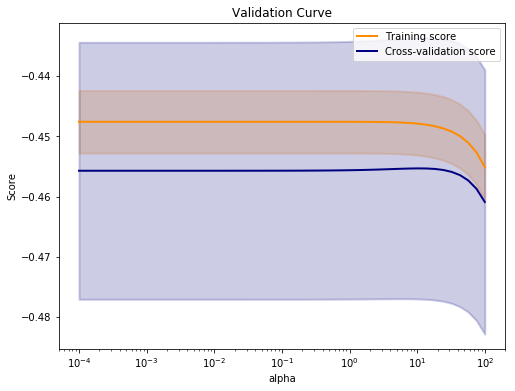

In [307]:
param_range = np.logspace(-4, 2, 50)
algo=Ridge()
scoring="neg_mean_squared_error"
param_name="alpha"
n_fold=5

    
    
valid_curve(param_range,algo,n_fold,scoring,param_name)
#le meilleur alpha appartient bien à l'intervalle 1e-4 , 1e2

In [308]:
alphas=np.logspace(-4,2,num=100)
#print(alphas)
ridge_cv=RidgeCV(alphas=alphas,scoring='mean_squared_error',cv=5)
ridge_cv.fit(X_train,y_train)

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_

RidgeCV(alphas=array([1.00000e-04, 1.14976e-04, ..., 8.69749e+01, 1.00000e+02]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='mean_squared_error', store_cv_values=False)

In [309]:
ridge_cv.alpha_

10.722672220103231

In [310]:
get_cross_val_score(Ridge(ridge_cv.alpha_),X_train,y_train,'neg_mean_squared_error',ShuffleSplit(n_splits=50, test_size=0.2))

#np.mean(cross_val_score(Ridge(ridge_cv.alpha_),X_train,y_train,scoring='neg_mean_squared_error',cv=ShuffleSplit(n_splits=100, test_size=0.2),n_jobs=2))

-0.4538


### Features Selection

### Lasso

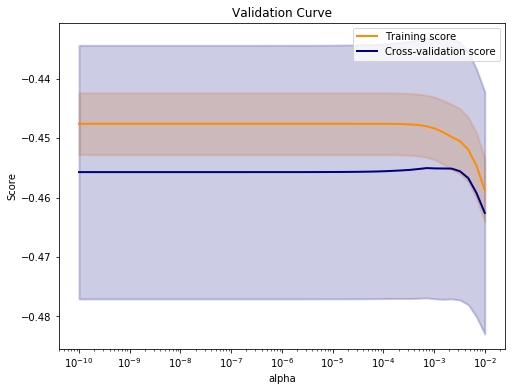

In [311]:

param_range = np.logspace(-10, -2, 50)
algo=Lasso()
scoring="neg_mean_squared_error"
param_name="alpha"
n_fold=5
    
valid_curve(param_range,algo,n_fold,scoring,param_name)
#on peut choisir alpha entre 1e-10 et 1e-2

In [312]:
alphas=np.logspace(-10,-2,num=50)


lasso_cv=LassoCV(alphas=alphas,cv=5,n_jobs=2)
lasso_cv.fit(X_train,y_train)


LassoCV(alphas=array([1.00000e-10, 1.45635e-10, 2.12095e-10, 3.08884e-10, 4.49843e-10,
       6.55129e-10, 9.54095e-10, 1.38950e-09, 2.02359e-09, 2.94705e-09,
       4.29193e-09, 6.25055e-09, 9.10298e-09, 1.32571e-08, 1.93070e-08,
       2.81177e-08, 4.09492e-08, 5.96362e-08, 8.68511e-08, 1.26486e-07,
     ..., 1.04811e-03, 1.52642e-03,
       2.22300e-03, 3.23746e-03, 4.71487e-03, 6.86649e-03, 1.00000e-02]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=2, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [313]:
print(list(zip(features_name,lasso_cv.coef_)))
#les variables qui ont été éliminiées par le Lasso optimal sont X2 et X5

[('X1', 0.05135229370522627), ('X2', -0.0), ('X4', -0.1947571846736895), ('X6', 0.014844540986331702), ('X7', 0.037028772946419715), ('X8', -0.013029754532568908), ('X9', 0.25492458371393156), ('X10', -0.018473889564868305), ('X11', -0.3252146150528736), ('X12', -0.02379615661249156), ('X13', -0.011023377700186077), ('X15', -0.18176504899010218), ('X17', 0.7711588494456572), ('X19', 1.031954293144012), ('X20', 0.0016180336608715195), ('X21', 0.11710340462558326), ('X22', -0.03222881482841912), ('X3_c', 0.33466953964913), ('X3_e', -0.11757310154354796), ('X3_f', 0.25488701771497796), ('X3_nan', 0.10657319807533504), ('X5_G', -0.0), ('X5_nan', -0.0), ('X14_D', 0.005978345089728778), ('X14_nan', 0.0), ('X16_d', -0.006515721155053818), ('X16_g', 0.0), ('X16_h', 0.1480452388709294), ('X16_nan', 0.0), ('X18_D', 0.3135545089772103), ('X18_nan', 0.11868524201653617)]


Computing regularization path using the lasso...


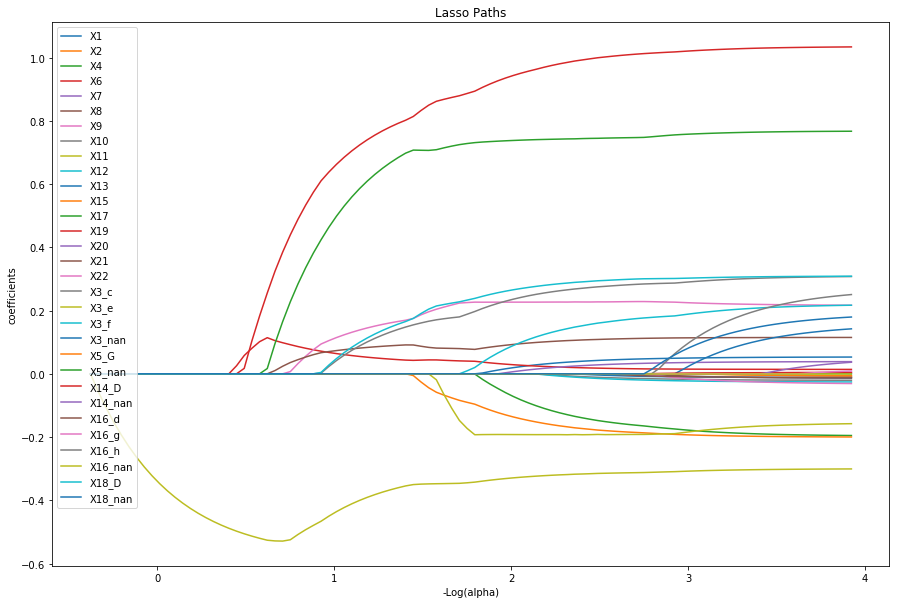

In [314]:
plt.rcParams['figure.figsize'] = [15, 10]


eps = 5e-5  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train, eps, fit_intercept=False)


plt.figure(1)
ax = plt.gca()


neg_log_alphas_lasso = -np.log10(alphas_lasso)

for (coef_l) in (coefs_lasso):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Paths')
plt.legend(features_name,loc='upper left')
plt.axis('tight')
print(l1)

#on voit que les variables les plus importantes sont X17,X19 et X11. X2 et X5 n'apparaissent jamais

In [315]:
plt.rcParams['figure.figsize'] = [8, 6]

In [316]:

lasso_cv.alpha_

0.0007196856730011514

Feature ranking:
1. feature X19 (0.250774)
2. feature X17 (0.171248)
3. feature X11 (0.116796)
4. feature X4 (0.053944)
5. feature X18_D (0.050231)
6. feature X22 (0.040743)
7. feature X15 (0.037425)
8. feature X21 (0.033042)
9. feature X6 (0.032705)
10. feature X9 (0.026772)
11. feature X3_e (0.018037)
12. feature X12 (0.017665)
13. feature X7 (0.017485)
14. feature X10 (0.017335)
15. feature X1 (0.017077)
16. feature X13 (0.017038)
17. feature X2 (0.016703)
18. feature X3_c (0.016688)
19. feature X8 (0.016346)
20. feature X20 (0.016336)
21. feature X3_f (0.006814)
22. feature X14_D (0.002441)
23. feature X5_G (0.002365)
24. feature X16_d (0.002315)
25. feature X16_g (0.000490)
26. feature X3_nan (0.000339)
27. feature X14_nan (0.000273)
28. feature X5_nan (0.000224)
29. feature X18_nan (0.000184)
30. feature X16_h (0.000165)
31. feature X16_nan (0.000000)


(-1, 31)

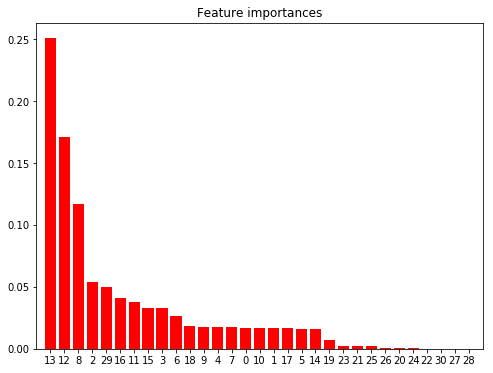

In [317]:
forest=RandomForestRegressor(max_features=1/3,n_estimators=500)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
 print("%d. feature %s (%f)" % (f + 1, features_name[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")


plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")



plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])

#egalement dans le Random Forest on voit que les 3 features les plus utilisees sont X19,X17 et X11.X2 et X5 sont très peut utilisées, ce qui est coherent avec le resultat du Lasso

In [318]:
grad_boost=GradientBoostingRegressor()
grad_boost.fit(X_train,y_train)

print(list(zip(features_name,grad_boost.feature_importances_)))
#les resultats de l'importance des features du gradient boosting sont coherents avec ceux du random forest et du Lasso

[('X1', 0.026515243489830028), ('X2', 0.012427461298087661), ('X4', 0.1415264530425605), ('X6', 0.003122198901885045), ('X7', 0.024466973781556097), ('X8', 0.009639644719672507), ('X9', 0.029555149158348296), ('X10', 0.04824737870915272), ('X11', 0.05793703445358056), ('X12', 0.019585044714155744), ('X13', 0.03891978247969571), ('X15', 0.06382871766863558), ('X17', 0.13539673521695522), ('X19', 0.20124194199117323), ('X20', 0.039940255346192444), ('X21', 0.04223102002514325), ('X22', 0.037842422067925645), ('X3_c', 1.6830192669379853e-05), ('X3_e', 0.008257216225658172), ('X3_f', 0.0), ('X3_nan', 0.0), ('X5_G', 0.0), ('X5_nan', 0.0), ('X14_D', 0.00020399623711547994), ('X14_nan', 0.0), ('X16_d', 0.0031097057200543754), ('X16_g', 0.0), ('X16_h', 0.0), ('X16_nan', 0.0), ('X18_D', 0.055988794559952426), ('X18_nan', 0.0)]


In [319]:

print(list(zip(features_name, lasso_cv.coef_)))#les variables x2 et x5 ne seraient pas pertinentes

####TO DO SELECT FROM MODEL SKLEARN

print(X_train.shape)

model_selection = SelectFromModel(Lasso(lasso_cv.alpha_).fit(X_train,y_train), prefit=True)

X_train_new = model_selection.transform(X_train)

X_train_new.shape

#variables retirées : X2,X5F,X5G,X14D,X16c a verifier

#Dans las suite on remplace X_train par X_train new (idem pour la classification pour Z : Y et Z étant fortement correlees par construction, la seleciton de modele pour Y s'applique egalement a Z) )

[('X1', 0.05135229370522627), ('X2', -0.0), ('X4', -0.1947571846736895), ('X6', 0.014844540986331702), ('X7', 0.037028772946419715), ('X8', -0.013029754532568908), ('X9', 0.25492458371393156), ('X10', -0.018473889564868305), ('X11', -0.3252146150528736), ('X12', -0.02379615661249156), ('X13', -0.011023377700186077), ('X15', -0.18176504899010218), ('X17', 0.7711588494456572), ('X19', 1.031954293144012), ('X20', 0.0016180336608715195), ('X21', 0.11710340462558326), ('X22', -0.03222881482841912), ('X3_c', 0.33466953964913), ('X3_e', -0.11757310154354796), ('X3_f', 0.25488701771497796), ('X3_nan', 0.10657319807533504), ('X5_G', -0.0), ('X5_nan', -0.0), ('X14_D', 0.005978345089728778), ('X14_nan', 0.0), ('X16_d', -0.006515721155053818), ('X16_g', 0.0), ('X16_h', 0.1480452388709294), ('X16_nan', 0.0), ('X18_D', 0.3135545089772103), ('X18_nan', 0.11868524201653617)]
(4991, 31)


(4991, 25)

## Hyperparameter Tuning

In [320]:
#Kernel Ridge

'''kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)},n_jobs=2)
kr.fit(X_train_new,y_train)
kr.best_estimator_'''
#KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      #kernel_params=None)

'kr = GridSearchCV(KernelRidge(kernel=\'rbf\', gamma=0.1), cv=5,\n                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],\n                              "gamma": np.logspace(-2, 2, 5)},n_jobs=2)\nkr.fit(X_train_new,y_train)\nkr.best_estimator_'

In [321]:
'''svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)},n_jobs=2)
svr.fit(X_train_new,y_train)
svr.best_estimator_'''
#SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
 # kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

'svr = GridSearchCV(SVR(kernel=\'rbf\', gamma=0.1), cv=5,\n                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],\n                               "gamma": np.logspace(-2, 2, 5)},n_jobs=2)\nsvr.fit(X_train_new,y_train)\nsvr.best_estimator_'

In [322]:
'''grid_RFR = {"max_features"      : np.linspace(0.3,0.8,6)}
RF=RandomForestRegressor(n_estimators=500)
grid_search_RFR = GridSearchCV(RF, grid_RFR, n_jobs=2, cv=5)
grid_search_RFR.fit(X_train_new, y_train)'''

'grid_RFR = {"max_features"      : np.linspace(0.3,0.8,6)}\nRF=RandomForestRegressor(n_estimators=500)\ngrid_search_RFR = GridSearchCV(RF, grid_RFR, n_jobs=2, cv=5)\ngrid_search_RFR.fit(X_train_new, y_train)'

In [323]:
#grid_searc_RFR.best_estimator_#best max_features 0.6
#grid_search.best_score_

In [324]:
'''grid_GBR = {"n_estimators"      : [100,150,200,250]}
GBR=GradientBoostingRegressor()
grid_search_GBR = GridSearchCV(GBR, grid_GBR, n_jobs=2, cv=5)
grid_search_GBR.fit(X_train_new, y_train)'''

'grid_GBR = {"n_estimators"      : [100,150,200,250]}\nGBR=GradientBoostingRegressor()\ngrid_search_GBR = GridSearchCV(GBR, grid_GBR, n_jobs=2, cv=5)\ngrid_search_GBR.fit(X_train_new, y_train)'

In [327]:
#grid_search_GBR.best_estimator_#best n_estimators 100
#grid_search.best_score_

## Selection du meilleur modele

Ridge
-0.45357
Lasso
-0.45812
Kernel Ridge
-0.3009
Polynome
-0.47699
Tree
-0.6135
RF
-0.29242
GradientBoosting
-0.29921
SVR
-0.308


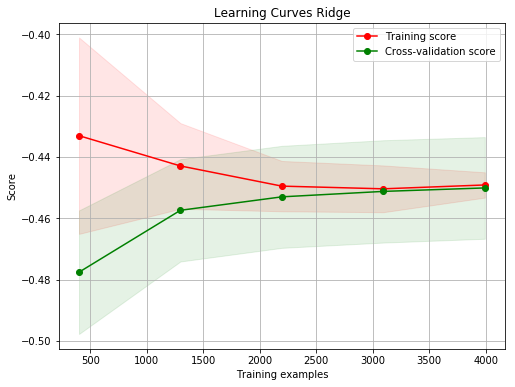

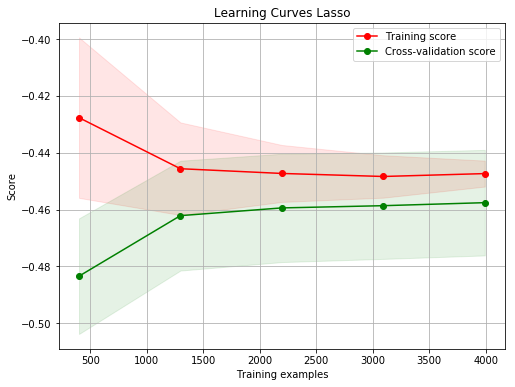

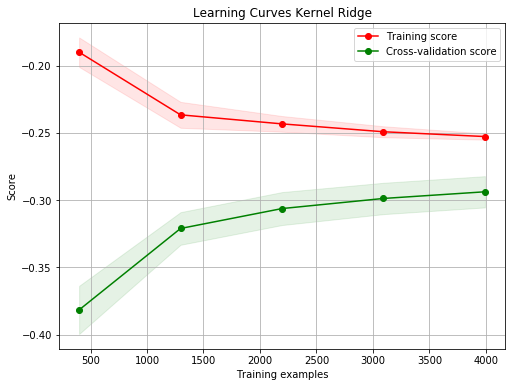

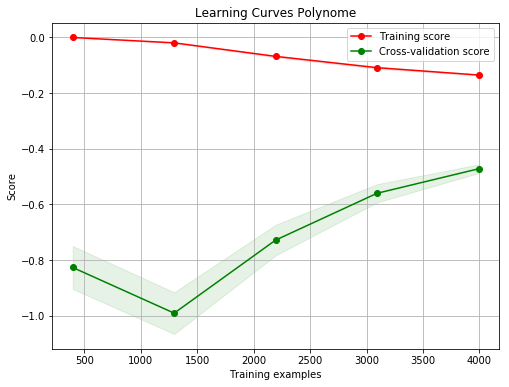

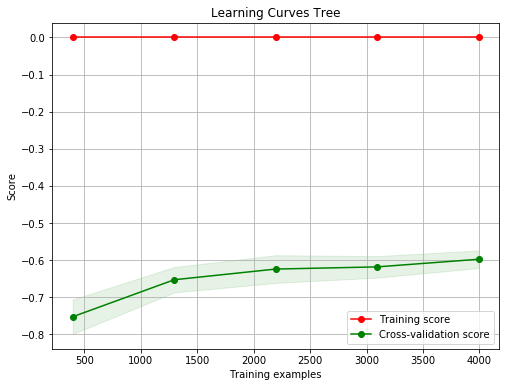

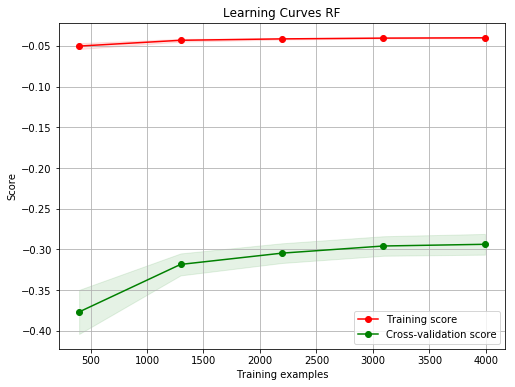

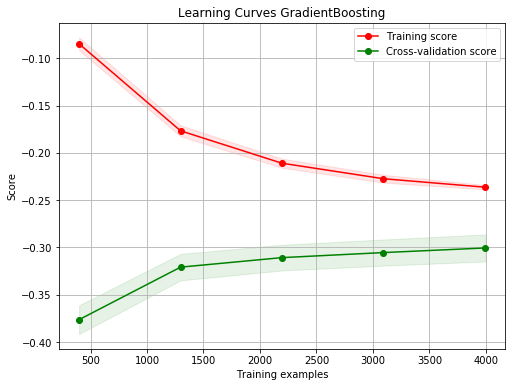

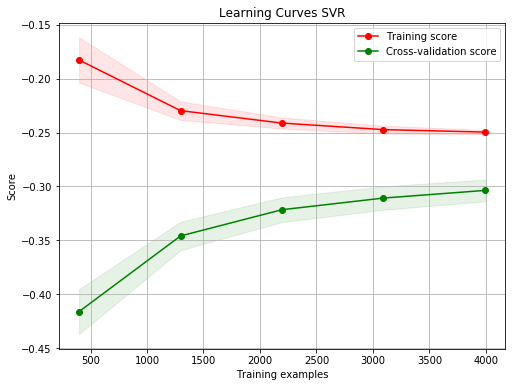

In [328]:

title = "Learning Curves"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=15, test_size=0.2)
scoring='neg_mean_squared_error'
algos = [Ridge(ridge_cv.alpha_),Lasso(alpha=lasso_cv.alpha_),KernelRidge(alpha=0.01, coef0=1, gamma=0.01, kernel='rbf',kernel_params=None),make_pipeline(PolynomialFeatures(3),Ridge()),DecisionTreeRegressor(),RandomForestRegressor(n_estimators=500,n_jobs=2,max_features=0.6),GradientBoostingRegressor(n_estimators=100),SVR(C=100.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)]


algos_names=['Ridge','Lasso','Kernel Ridge','Polynome','Tree','RF','GradientBoosting','SVR']    


for (algo,algo_name) in zip(algos,algos_names):
    plt.figure()
    plot_learning_curve(algo, (title+' '+algo_name), X_train_new, y_train, cv=cv, n_jobs=2,scoring=scoring)
    print(algo_name)
    get_cross_val_score(algo,X_train_new,y_train,scoring,cv)


In [329]:
# Split the data into a training set and a test set
X_train_RFR, X_test_RFR, y_train_RFR, y_test_RFR = train_test_split(X_train_new, y_train)

In [330]:


best_model_regression=RandomForestRegressor(n_estimators=500,n_jobs=2,max_features=0.6)

best_model_regression.fit(X_train_RFR,y_train_RFR)
y_pred = best_model_regression.predict(X_test_RFR)

Text(0,0.5,'Predicted')

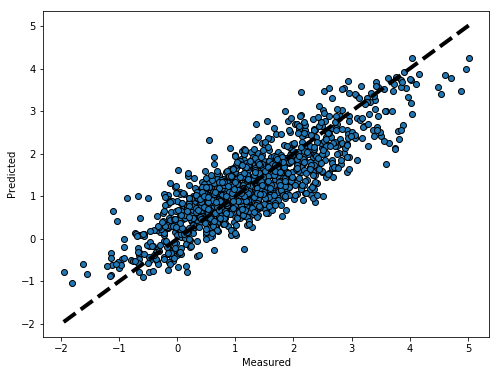

In [331]:
fig, ax = plt.subplots()
ax.scatter(y_test_RFR, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test_RFR.min(), y_test_RFR.max()], [y_test_RFR.min(), y_test_RFR.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [332]:
mean_squared_error(y_test_RFR,y_pred)

0.30027339162752353

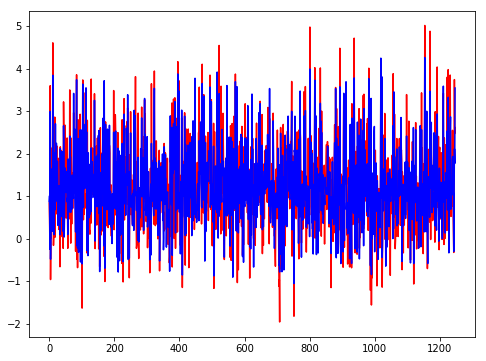

In [333]:
plt.plot(y_test_RFR,'r')
plt.plot(y_pred,'b')

### Apprentissage du meilleur modele de regression sur l'ensemble des features selectionnees sur le jeu d'entrainement

In [334]:
best_model_regression=KernelRidge(alpha=0.01, coef0=1, gamma=0.01, kernel='rbf',
      kernel_params=None)
best_model_regression.fit(X_train_new,y_train)

KernelRidge(alpha=0.01, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      kernel_params=None)

## Classification pour Z

In [335]:
#X_train=data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1).values
z_train=data_train_imputed.Z.values.astype('int')
#features_name=list(data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1))
#print(z_train.dtype)

In [336]:
print(round(data_train_imputed['Z'].value_counts()/len(data_train_imputed),3))
#le classifieur naïf qui classifirait 1 tout obersvation aurait un score d'environ 68.7%, le score de classification obtenu ulterieursement doit s'apprécier par rapport à cette valeur

1    0.687
2    0.203
0    0.110
Name: Z, dtype: float64


### Premiers modeles 

#### Regressions Logistiques (pénalités Ridge et Lasso)

In [337]:
Cs=np.logspace(-3,3,num=100)
#print(alphas)
ridge_logistic_cv=LogisticRegressionCV(Cs=Cs,scoring='accuracy',cv=5,penalty='l2',n_jobs=2)#5-fold startifie
ridge_logistic_cv.fit(X_train,z_train)
ridge_logistic_cv.C_

array([4.33, 2.85, 2.15])

In [338]:
get_cross_val_score(LogisticRegression(C=ridge_logistic_cv.C_[0],penalty='l2'),X_train_new,z_train,scoring='accuracy',cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2))

0.8015


In [361]:
Cs=np.logspace(-3,3,num=10)
#print(alphas)
lasso_logistic_cv=LogisticRegressionCV(Cs=Cs,scoring='accuracy',cv=5,penalty='l1',n_jobs=2,solver='saga')
lasso_logistic_cv.fit(X_train_new,z_train)
print(lasso_logistic_cv.C_)
get_cross_val_score(LogisticRegression(C=lasso_logistic_cv.C_[0],penalty='l1'),X_train_new,z_train,scoring='accuracy',cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2))



C:\Users\oussa\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



[ 46.42 215.44  10.  ]
0.8026


#### KNN

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48]
The optimal number of neighbors is 22


Text(0,0.5,'Misclassification Error')

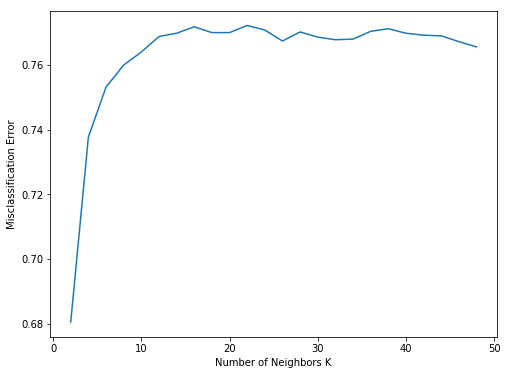

In [340]:
# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = [x for x in  list(range(1,50)) if x % 2 == 0  ]

print (neighbors)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_new, z_train, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    cv_scores.append(scores.mean())
    


# changing to misclassification error
MSE = [x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(max(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.plot(list(neighbors), cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')    



In [341]:
get_cross_val_score(KNeighborsClassifier(n_neighbors=optimal_k),X_train_new,z_train,scoring='accuracy',cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2))


0.77518


## Hyperparameter Tuning 

In [342]:
'''svc = GridSearchCV(SVC(kernel='rbf', gamma=0.1), cv=StratifiedKFold(n_splits=5),
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)},n_jobs=2)
svc.fit(X_train_new,z_train)

print("The best parameters are %s with a score of %0.2f"
      % (svc.best_params_, svc.best_score_))'''

#The best parameters are {'C': 100.0, 'gamma': 0.01} with a score of 0.82

'svc = GridSearchCV(SVC(kernel=\'rbf\', gamma=0.1), cv=StratifiedKFold(n_splits=5),\n                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],\n                               "gamma": np.logspace(-2, 2, 5)},n_jobs=2)\nsvc.fit(X_train_new,z_train)\n\nprint("The best parameters are %s with a score of %0.2f"\n      % (svc.best_params_, svc.best_score_))'

In [343]:
'''RFC = GridSearchCV(RandomForestClassifier(n_estimators=500), cv=StratifiedKFold(n_splits=5),param_grid={"max_features": ['sqrt',0.3,0.4,0.5,0.6,0.7,0.8]},  n_jobs=2)

RFC.fit(X_train_new,z_train)

print("The best parameters are %s with a score of %0.2f"
      % (RFC.best_params_, RFC.best_score_))'''
#The best parameters are {'max_features': 0.5} with a score of 0.83

'RFC = GridSearchCV(RandomForestClassifier(n_estimators=500), cv=StratifiedKFold(n_splits=5),param_grid={"max_features": [\'sqrt\',0.3,0.4,0.5,0.6,0.7,0.8]},  n_jobs=2)\n\nRFC.fit(X_train_new,z_train)\n\nprint("The best parameters are %s with a score of %0.2f"\n      % (RFC.best_params_, RFC.best_score_))'

In [344]:
'''GBC = GridSearchCV(GradientBoostingClassifier(), cv=StratifiedKFold(n_splits=5),param_grid={"n_estimators": [100,150,200,250]},  n_jobs=2)

GBC.fit(X_train_new,z_train)

print("The best parameters are %s with a score of %0.2f"
      % (GBC.best_params_, GBC.best_score_))'''
#The best parameters are {'n_estimators': 100} with a score of 0.83

'GBC = GridSearchCV(GradientBoostingClassifier(), cv=StratifiedKFold(n_splits=5),param_grid={"n_estimators": [100,150,200,250]},  n_jobs=2)\n\nGBC.fit(X_train_new,z_train)\n\nprint("The best parameters are %s with a score of %0.2f"\n      % (GBC.best_params_, GBC.best_score_))'

## Selection du meilleur modele 

Ridge Logistic Regression
0.7986
Lasso Logistic Regression
0.7998
KNN
0.7701
Tree
0.74635
RF
0.83343
GradientBoosting
0.83063
SVM
0.82382
Multi-Layer Perceptron
0.81695


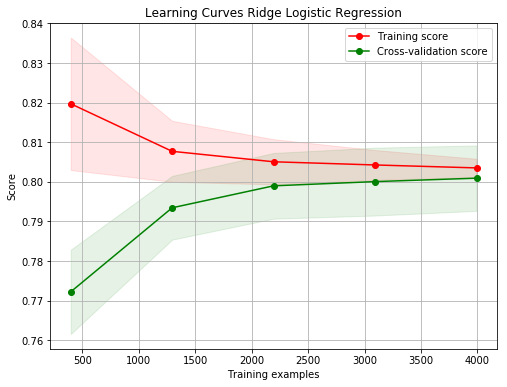

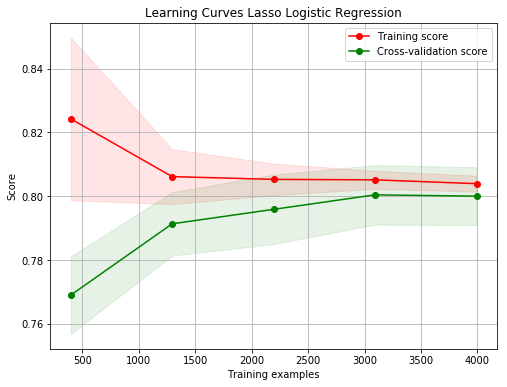

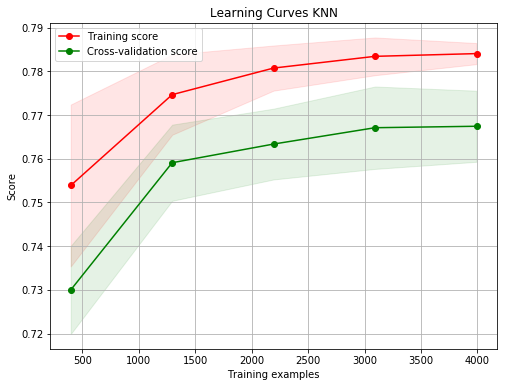

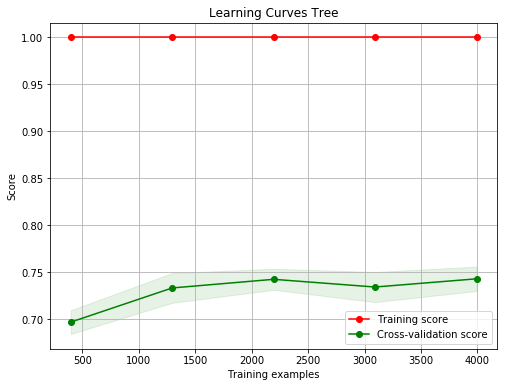

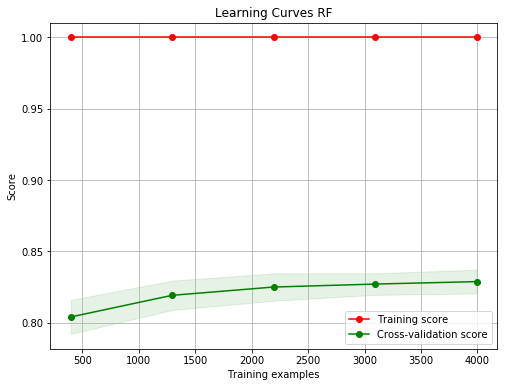

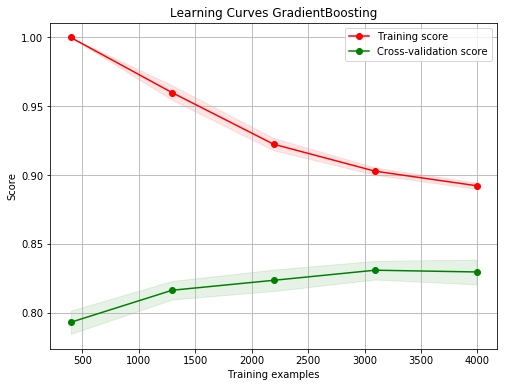

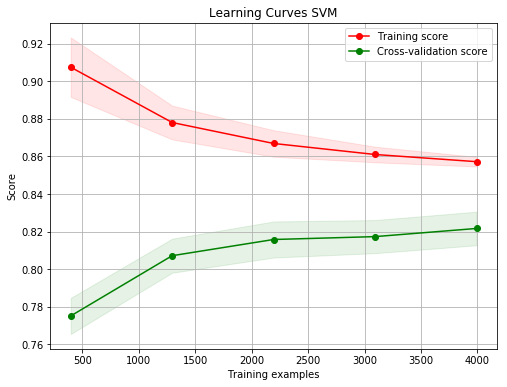

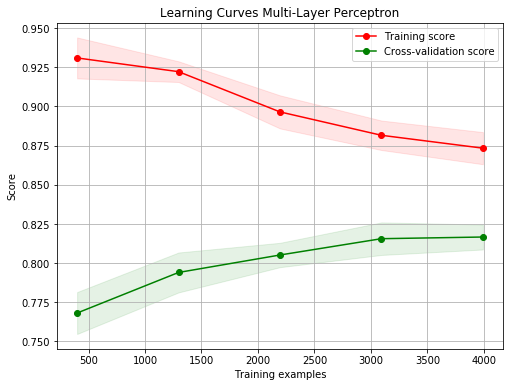

In [345]:

title = "Learning Curves"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = StratifiedShuffleSplit(n_splits=15, test_size=0.2)
scoring='accuracy'
algos = [LogisticRegression(C=ridge_logistic_cv.C_[0],penalty='l2'),LogisticRegression(C=lasso_logistic_cv.C_[0],penalty='l1'),KNeighborsClassifier(n_neighbors=optimal_k),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=500,max_features=0.5),GradientBoostingClassifier(n_estimators=100),SVC(kernel='rbf', gamma=0.01,C=100),MLPClassifier()]


algos_names=['Ridge Logistic Regression','Lasso Logistic Regression','KNN','Tree','RF','GradientBoosting','SVM','Multi-Layer Perceptron']    


for (algo,algo_name) in zip(algos,algos_names):
    plt.figure()
    plot_learning_curve(algo, (title+' '+algo_name), X_train_new, z_train, cv=cv, n_jobs=2,scoring=scoring)
    print(algo_name)
    get_cross_val_score(algo,X_train_new,z_train,scoring,cv)


In [346]:
# Split the data into a training set and a test set
X_train_RF, X_test_RF, z_train_RF, z_test_RF = train_test_split(X_train_new, z_train)

In [347]:
best_model_classification=RandomForestClassifier(n_estimators=500,max_features='sqrt')
best_model_classification.fit(X_train_RF,z_train_RF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [348]:
z_pred = best_model_classification.predict(X_test_RF)

Confusion matrix, without normalization
[[ 63  67   0]
 [ 20 815  52]
 [  0  84 147]]
Normalized confusion matrix
[[0.48 0.52 0.  ]
 [0.02 0.92 0.06]
 [0.   0.36 0.64]]


0.8213141025641025

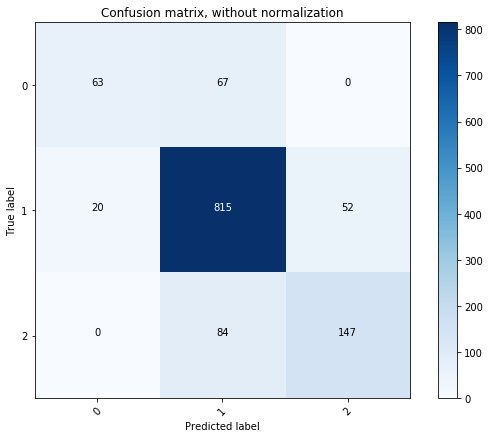

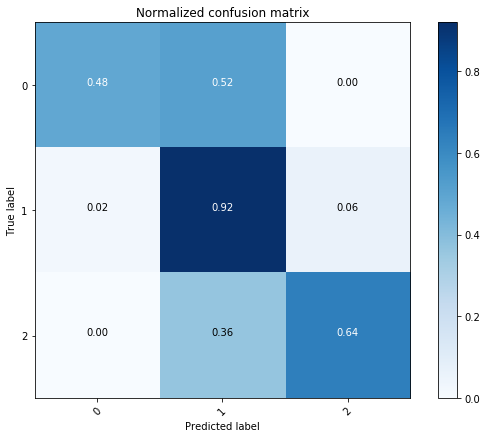

In [349]:


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
# Compute confusion matrix
cnf_matrix = confusion_matrix(z_test_RF, z_pred)
np.set_printoptions(precision=2)

class_names=[0,1,2]
    
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

accuracy_score(z_pred,z_test_RF)

### Apprentissage du meilleur modele de regression sur l'ensemble des features selectionnees sur le jeu d'entrainement

In [350]:
best_model_classification=RandomForestClassifier(n_estimators=500,max_features=0.5)
best_model_classification.fit(X_train_new,z_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Predictions sur le jeu de test

In [351]:
data_test=pd.read_csv('test.csv')


data_test['X3']=data_test['X3'].astype('object')
data_test['X5']=data_test['X5'].astype('object')
data_test['X14']=data_test['X14'].astype('object')
data_test['X16']=data_test['X16'].astype('object')
data_test['X18']=data_test['X18'].astype('object')

In [352]:
data_test = pd.get_dummies(data_test, columns = ['X3','X5','X14','X16','X18'] ,dummy_na=True,drop_first=True)

#features_name=list(data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1))
   

In [353]:

#verification de l'alignement des features train et test
features_name_test=list(data_test)

for i,j in zip(features_name,features_name_test):
    print(i,data_train_imputed.drop(['Y','Z','nb_cluster_2'],axis=1).columns.get_loc(i),j,data_test.columns.get_loc(j))
    
 

X1 0 X1 0
X2 1 X2 1
X4 2 X4 2
X6 3 X6 3
X7 4 X7 4
X8 5 X8 5
X9 6 X9 6
X10 7 X10 7
X11 8 X11 8
X12 9 X12 9
X13 10 X13 10
X15 11 X15 11
X17 12 X17 12
X19 13 X19 13
X20 14 X20 14
X21 15 X21 15
X22 16 X22 16
X3_c 17 X3_c 17
X3_e 18 X3_e 18
X3_f 19 X3_f 19
X3_nan 20 X3_nan 20
X5_G 21 X5_G 21
X5_nan 22 X5_nan 22
X14_D 23 X14_D 23
X14_nan 24 X14_nan 24
X16_d 25 X16_d 25
X16_g 26 X16_g 26
X16_h 27 X16_h 27
X16_nan 28 X16_nan 28
X18_D 29 X18_D 29
X18_nan 30 X18_nan 30


In [354]:

X_test=MICE().complete(data_test)



model_selection = SelectFromModel(Lasso(lasso_cv.alpha_).fit(X_train,y_train), prefit=True)

X_test_new = model_selection.transform(X_test)

X_test_new.shape
#variables retirées : X2,X5F,X5G,X14D,X16c

#Dans las suite on remplace X_train par X_train new (idem pour la classification pour Z )

[MICE] Completing matrix with shape (4991, 31)
[MICE] Starting imputation round 1/110, elapsed time 0.011
[MICE] Starting imputation round 2/110, elapsed time 0.339
[MICE] Starting imputation round 3/110, elapsed time 0.519
[MICE] Starting imputation round 4/110, elapsed time 0.728
[MICE] Starting imputation round 5/110, elapsed time 0.882
[MICE] Starting imputation round 6/110, elapsed time 1.083
[MICE] Starting imputation round 7/110, elapsed time 1.268
[MICE] Starting imputation round 8/110, elapsed time 1.483
[MICE] Starting imputation round 9/110, elapsed time 1.643
[MICE] Starting imputation round 10/110, elapsed time 1.853
[MICE] Starting imputation round 11/110, elapsed time 2.023
[MICE] Starting imputation round 12/110, elapsed time 2.239
[MICE] Starting imputation round 13/110, elapsed time 2.406
[MICE] Starting imputation round 14/110, elapsed time 2.615
[MICE] Starting imputation round 15/110, elapsed time 2.787
[MICE] Starting imputation round 16/110, elapsed time 3.003
[M

(4991, 25)

In [355]:
Y_test=best_model_regression.predict(X_test_new)
Z_test=best_model_classification.predict(X_test_new)

#### Test de coherence

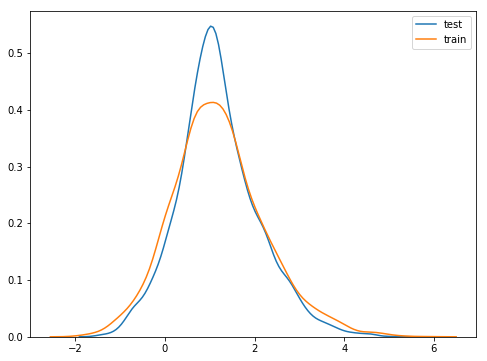

In [356]:

sns.kdeplot(Y_test,label='test')
sns.kdeplot(y_train, bw=.2, label="train")
#les 2 densites sont plutot proches, avec plus d'extremes (min et max) pour train par rapport a test

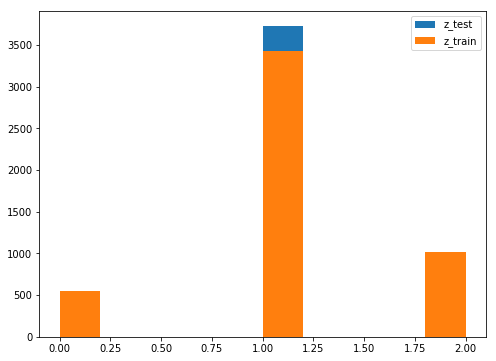

In [357]:
plt.hist(Z_test, label='z_test')
plt.hist(z_train, label='z_train')
plt.legend(loc='upper right')

#les histogrammes train et test sont tres proches, avec un peu plus de categorie 1 pour z test ce qui est coherent avec le test sur les densites

In [358]:
Predictions=pd.DataFrame({'Y':Y_test, 'Z':Z_test})

In [359]:

Predictions['Z']=Predictions['Z'].astype('str').astype('category')
Predictions.dtypes
Predictions.head()

Y  Z
0  1.247139  1
1  1.232051  1
2  1.317944  1
3  1.712099  1
4  2.062436  2

In [360]:
pandas2ri.activate()


saveRDS = robjects.r['saveRDS']
saveRDS(Predictions, 'predictions.rds')

rpy2.rinterface.NULL